<a href="https://colab.research.google.com/github/pastoril10/PrecoCarro_Regressao/blob/main/PrecoDeCarro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas e as primeiras análises

In [176]:
#Importando as bibliotecas que usaremos
import pandas as pd
import numpy as np

#Biblioteca de visualização
import missingno as mso
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

#biblioteca de processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer

In [2]:
#Importando conjunto de dados
df = pd.read_csv("used_cars_data.csv")

In [3]:
#Verificando a ultimas entradas de dados
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
#Excluindo a coluna que replica o indice
df.drop(columns = "S.No.", inplace = True)

In [5]:
##Buscando as primeiras informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
#Tamanho das linhas e colunas
df.shape

(7253, 13)

In [7]:
#Existe dados faltantes?
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

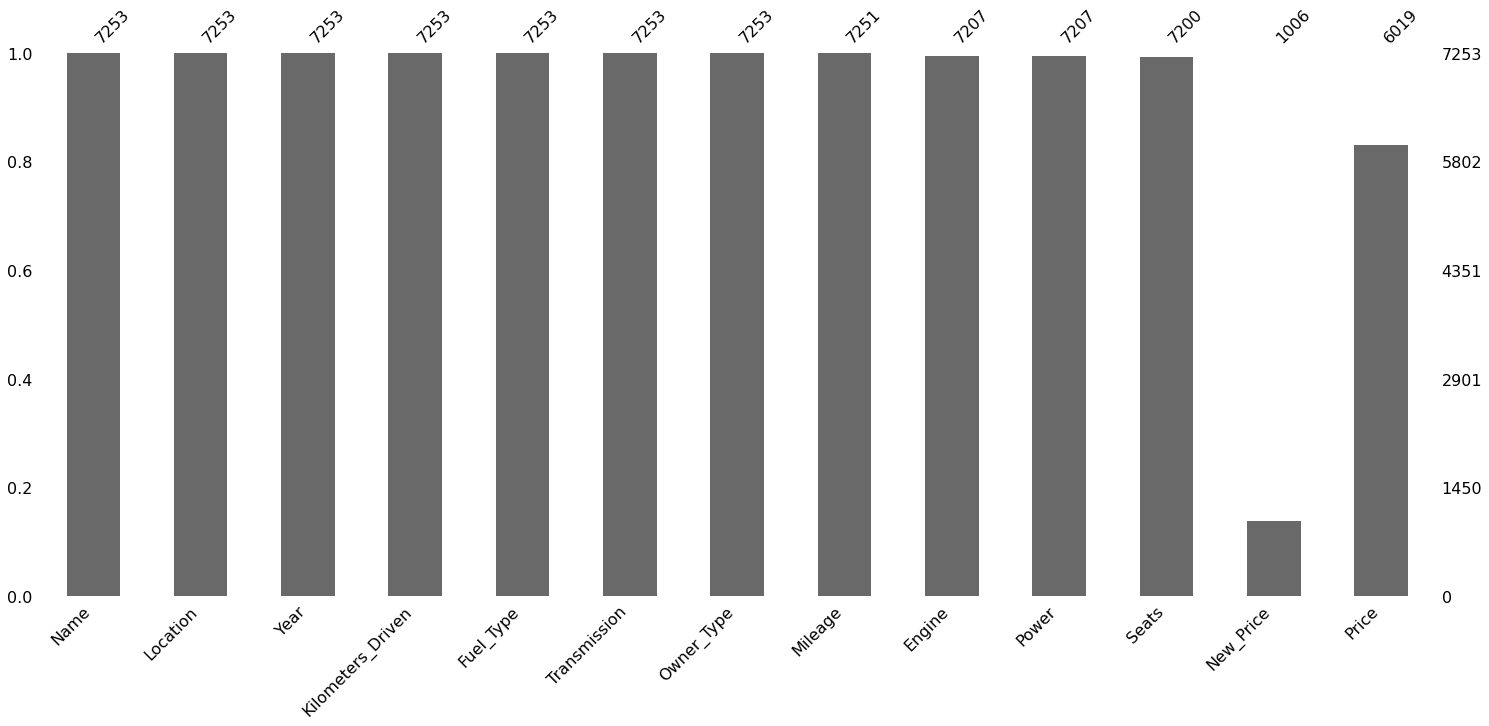

In [8]:
#Visualizando os dados faltantes
mso.bar(df)

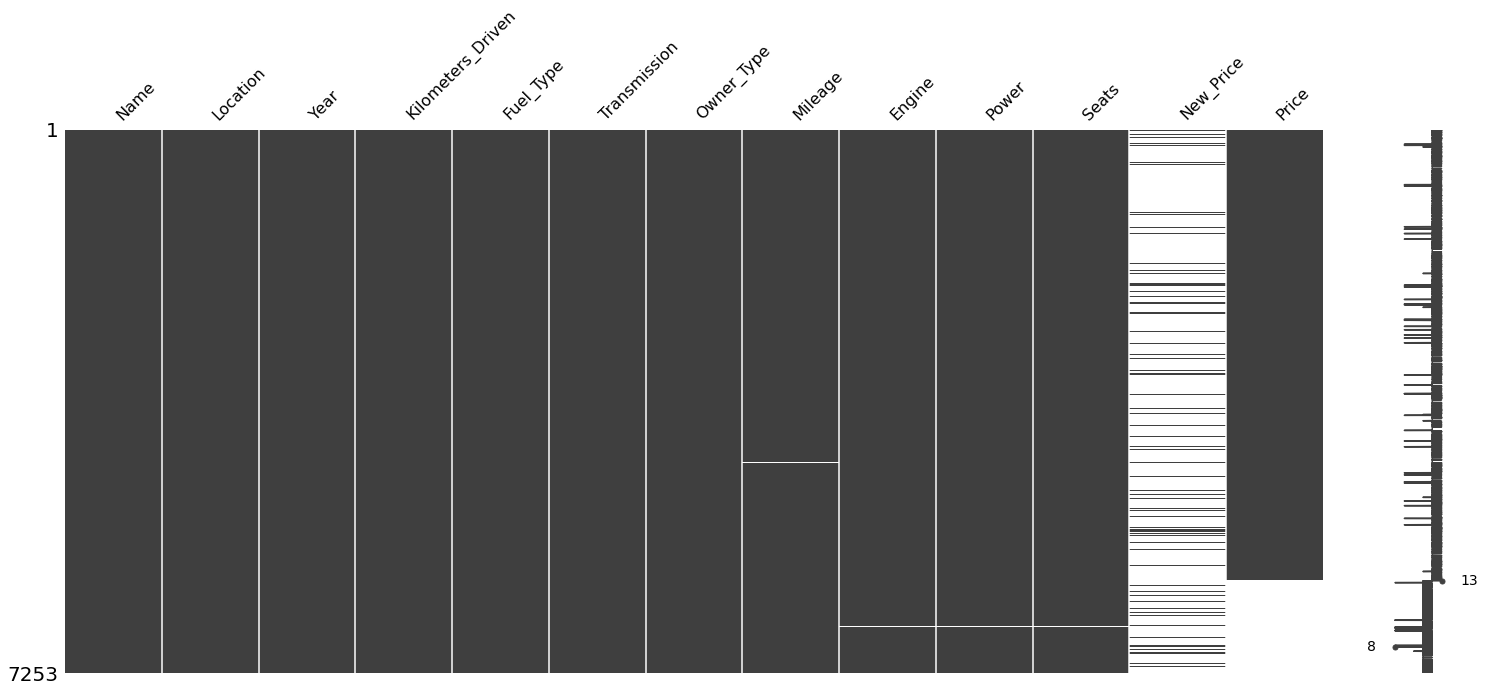

In [9]:
#Visualizando os dados faltantes
mso.matrix(df)

**Observações - dados faltantes**

Em nosso DataFrame original, temos que:

NewPrice - Possue mais que 85 % dos dados falantes

Price - Possue mais que 15 % dos dados faltantes

Seats - Possue apenas 53 dos dados faltantes

Power e Engine - 46 dados faltantes



## Feater Engineer

Vamos, inicialmente olhar para cada coluna e tratar os valores nulos e/ou faltantes.

### Name - nome do carro

A partir do nome do carro conseguimos criar 2 novas colunas, coluna com a marca e coluna com os modelos.
Mostramos graficamente as top 10 marcas e modelos.

In [10]:
df["Name"].dtype

dtype('O')

In [11]:
df["Name"].isnull().sum()

0

Não temos dado faltantes na coluna "Name"

In [12]:
df["Name"].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [13]:
df["Name"].nunique()

2041

In [14]:
#Criando as colunas marca 
df['Brand'] = df['Name'].str.split(' ').str[0] 
#Criando a coluna modelo 
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [15]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

Isuzu e ISUZU são as mesmas marcas.

Mini é o Mini Cooper

Land é a Land Rover

vamos fazer essas mudanças

In [16]:
df.loc[df["Brand"] == "ISUZU", "Brand"] = "Isuzu"
df.loc[df["Brand"] == "Mini", "Brand"] = "Mini Cooper"
df.loc[df["Brand"] == "Land", "Brand"] = "Land Rover"

In [17]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  df["Brand"].value_counts().index[0:10],
                y =  df["Brand"].value_counts().values,
                marker = {"color":"Orange",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Top 10 - Marca vs Quantidade",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Marcas"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [18]:
df["Model"].value_counts()

SwiftDzire        189
Grandi10          179
WagonR            178
Innova2.5         145
Verna1.6          127
                 ... 
XUV500W7            1
Rapid2013-2016      1
E-ClassE400         1
AspireAmbiente      1
Tiago1.05           1
Name: Model, Length: 726, dtype: int64

In [19]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  df["Model"].value_counts().index[0:10],
                y =  df["Model"].value_counts().values,
                marker = {"color":"pink",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Top 10 - Modelo vs Quantidade",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Modelo"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [20]:
#Existe algum dado faltante na nova coluna Model? Simm
df["Model"].isnull().sum()

1

In [21]:
#Exluindo este dado faltante
df.dropna(subset=["Model"],
          inplace = True)

As marcas predominante em nosso conjunto de dados são Maruti, Hyundai e Honda. Os modelos mais usados são SwiftDzire (marca Maruti), Grandi10 (marca Hyundai) e WagonR (marca Maruti). 

### Location - Localização

In [22]:
#Verificando o tipo de dado que temos nessa coluna
df["Location"].dtype

dtype('O')

In [23]:
#Verificando se tem informação faltando
df["Location"].isnull().sum()

0

Não temos dados faltantes na coluna "Location"

In [24]:
#Verificando quais são as cidades
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [25]:
#Quantidade de cidades diferentes que temos
df["Location"].nunique()

11

In [26]:
#Quantidade de carros por cidade em nosso df
df["Location"].value_counts()

Mumbai        949
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [27]:
import plotly.offline as py
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  df["Location"].value_counts().index,
                y =  df["Location"].value_counts().values,
                marker = {"color":"Blue",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Cidades vs Quantidade de carros",
                   yaxis = {"title": "Quantidade", },
                   xaxis = {"title":"Localização - Cidades Indianas"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Year - Ano

In [28]:
#Verificando o tipo de dado
df["Year"].dtype

dtype('int64')

In [29]:
#Verificando se temos dados faltantes
df["Year"].isnull().sum()

0

Não temos dados faltantes na coluna "Year"

In [30]:
#Verificando todos os anos em nosso conjunto de dados
df["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996])

In [31]:
#Quandidade de anos diferentes
df["Year"].nunique()

23

In [32]:
#Plotando um hisograma dos anos 
trace1 = go.Histogram(x =  df["Year"],
                      marker = {"color":"Green",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Ano vs Quantidade",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Ano"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [33]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["Year"],
                 name = "Ano",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão dos anos",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Ano"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [34]:
#Criando a coluna 
Ano_atual = 2022
df["car_age"] = Ano_atual - df["Year"]

### Kilometers_Driven - km rodados

In [35]:
#Análisando o tipo de dado na coluna
df["Kilometers_Driven"].dtype

dtype('int64')

In [36]:
#Verificando se temos dados faltantes
df["Kilometers_Driven"].isnull().sum()

0

Não temos valores faltantes na coluna "Kilometers_Driven"

In [37]:
#Verificar a quantidade de cada valor
df["Kilometers_Driven"].nunique()

3660

In [38]:
#Valor máxino na coluna
df["Kilometers_Driven"].max()

6500000

Valor máximo 

In [39]:
#Valor minimo
df["Kilometers_Driven"].min()

171

Valor minimo

In [40]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
#criando o tipo de gráfico
trace1 = go.Bar(x = df["Kilometers_Driven"].sort_values(ascending = True).value_counts(sort = False).index[0:3500],
                y =  df["Kilometers_Driven"].sort_values(ascending = True).value_counts(sort = False).values,               
                name = "Distribuição dos kms rodados",
                marker = {"color":"Blue",
                          "line": {'width': 2,
                                   'color': '#c0392b'}})

data = [trace1]

layout = go.Layout(title= "Kms rodados vs Quantidade",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Kms rodados"},
                   xaxis2=dict(domain=[0.05, 0.8],
                               anchor='y2'),
                   yaxis2=dict(domain=[0.65, 0.98],
                               anchor='x2'))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Acima segue um a distrbuição dos dados até cerca de 130k kms

É possivel verificar que existe uma distribuição ampla no km rodado, tendo dados acima de 6 milhões de km.

### Fuel_Type - Tipo de combustével 

In [41]:
df["Fuel_Type"].dtype

dtype('O')

In [42]:
df["Fuel_Type"].isnull().sum()

0

In [43]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [44]:
df["Fuel_Type"].value_counts()

Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

Na coluna tipo de combustivel temos 5 tipos. A grande maioria dos carros usam Diesel ou Gasolina. 

In [45]:
px.pie(names=df["Fuel_Type"].value_counts().index,
       values=df["Fuel_Type"].value_counts().values,
       width = 500,
       height = 500)

### Transmission - Tipo de transmissão

In [46]:
df["Transmission"].dtype

dtype('O')

In [47]:
df["Transmission"].isnull().sum()

0

Nõa temos dados faltantes na coluna Transmission

In [48]:
df["Transmission"].value_counts()

Manual       5203
Automatic    2049
Name: Transmission, dtype: int64

In [49]:
px.pie(names=df["Transmission"].value_counts().index,
       values=df["Transmission"].value_counts().values,
       width = 500,
       height = 500)

Sobre o tipo de transmissão, temos os tipos manual e automatico. Mais de 2/3 dos dados são do tipo Manual.

### Owner_Type - Dono 

In [50]:
df["Owner_Type"].dtype

dtype('O')

In [51]:
df["Owner_Type"].isnull().sum()

0

In [52]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [53]:
df["Owner_Type"].value_counts()

First             5952
Second            1151
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [54]:
px.pie(names=df["Owner_Type"].value_counts().index,
       values=df["Owner_Type"].value_counts().values,
       width = 500,
       height = 500)

82% dos carros são carros de primeiro dono.

### Mileage - Quilometragem

In [55]:
df["Mileage"].dtype

dtype('O')

In [56]:
df["Mileage"].isnull().sum()

2

Existem 2 dados faltantes nessa coluna

In [57]:
#Alguns dos valores
df["Mileage"].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [58]:
#Excluindo o Kmpl e Km/g para podermos transformar a coluna em float
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

In [59]:
#Verificando os valores Mileage = 0
df.query("Mileage == 0.0")['Mileage'].count()

0

Temos 81 valores de Mileage igual a 0

In [60]:
#Transformando em float
df["Mileage"] = df["Mileage"].astype(float)

In [61]:
#Tranformando em valores Mileage == 0 em valores Nan
df.loc[df["Mileage"] == 0.0,'Mileage'] = np.nan

In [62]:
df["Mileage"].isnull().sum()

83

In [63]:
#dropping rows with name as null
df.dropna(subset=['Mileage'], 
          inplace = True)

In [64]:
df["Mileage"].isnull().sum()

0

In [65]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Histogram(x =  df["Mileage"],
                      marker = {"color":"Blue",
                              "line": {'width': 2,
                                      'color': 'lightpink'}})

layout = go.Layout(title= "Quilometragem média",
                  xaxis = {"title":"Quilometragem Km/g"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [66]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["Mileage"],
                 name = "Mileage",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão da Quilometragem",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Quilometragem média"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Engine

In [67]:
df["Engine"].dtype

dtype('O')

In [68]:
df["Engine"].isnull().sum()

34

In [69]:
df["Engine"].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '4806 CC', '1998 CC', '1193 CC', '1086 CC',
       '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC', '1799 CC',
       '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC', '2894 CC',
       '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC', '1390 CC',
       '1364 CC', nan, '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1950 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [70]:
#Excluindo o CC em cada coluna
df["Engine"] = df["Engine"].str.rstrip(" CC")

In [71]:
#Transformando a coluna em float
df["Engine"] = df["Engine"].astype(float)

In [72]:
#dropping rows with name as null
df.dropna(subset=['Engine'], 
          inplace = True)

In [73]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["Engine"],
                 name = "Engine - Motor",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Motor em CC",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Cilindras"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Power

In [74]:
df["Power"].dtype

dtype('O')

In [75]:
df["Power"].isnull().sum()

0

In [76]:
df["Power"].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '175.56 bhp', '98.6 bhp',
       '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp', '177.01 bhp',
       '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp', '138.1 bhp',
       '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp', '82 bhp',
       '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp', '77 bhp',
       '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp', '163.7 bhp',
       '71 bhp', '105 bhp', '174.33 bhp', '75 bhp', '103.2 bhp',
       '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp', '68 bhp',
       '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp', '500 bhp',
       '108.5 bhp', '86.8 bhp', '187.74 bhp', 'null bhp', '132 bhp',
       '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp', '168.5 bhp',
       '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp', '67 bhp',
       '241.4 bhp', '35 bhp', '270.9 bhp', '

In [77]:
df["Power"] = df["Power"].str.rstrip(" bhp")

In [78]:
#Tranformando em valores Mileage == 0 em valores Nan
df.loc[df["Power"]== "null",'Power']= np.nan

In [79]:
#dropping rows with name as null
df.dropna(subset=['Power'], 
          inplace = True)

In [80]:
df["Power"] = df["Power"].astype(float)

In [81]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["Power"],
                 name = "Potencia em bhp (brake horse power)",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão da Potencia em bhp",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Potencia"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Dispersão bastante grande

### Seats

In [82]:
df["Seats"].dtype

dtype('float64')

In [83]:
df["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9., nan])

In [84]:
df["Seats"].isnull().sum()

1

In [85]:
df.dropna(subset=["Seats"],
          inplace = True)

In [86]:
#Mudando a coluna para inteiro
df["Seats"] = df["Seats"].astype(int)

In [87]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Histogram(x =  df["Seats"],
                      marker = {"color":"Blue",
                              "line": {'width': 2,
                                      'color': 'lightpink'}})

layout = go.Layout(title= "Quantidade de lugares - Seats",
                  xaxis = {"title":"Seats"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### New Price

Agora, vamos dividir os 15 % dos dados onde não possuem o Price e um novo dataframe e o restante, os 85% em outro

In [88]:
df["New_Price"].dtype

dtype('O')

In [89]:
df["New_Price"].isnull().sum()

6037

Vamos ter um conjunto de dado sem o preço do carro novo, iremos chamar de df_nonewprice. Outro df com o restante dos dados, chamado de df_newprice

In [90]:
len(df)

7038

In [91]:
df["New_Price"].isnull().sum()/len(df) * 100

85.77720943449843

86% dos dados da coluna New_Price estão ausentes.

Vamos dividir em 2 df. 1 que contenha os dados New Price e outro que não

In [92]:
df["New_Price"].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '11.81 Lakh',
       '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh', '27 Lakh',
       '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh', '14.44 Lakh',
       '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr', '60.88 Lakh',
       '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh', '10.52 Lakh',
       '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh', '5.29 Lakh',
       '44.28 Lakh', '20.74 Lakh', '11.74 Lakh', '25.52 Lakh',
       '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh', '25.4 Lakh',
       '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr', '58.67 Lakh',
       '28.37 Lakh', '4.48 Lakh', '72.64 Lakh', '36.15 Lakh',
       '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh', '33.91 Lakh',
       '12.51 Lakh', '9.74 Lakh', '95.38 Lakh', '60.59 Lakh',
       '11.28 Lakh', '11.48 Lakh', 

In [93]:
df["New_Price"] = df["New_Price"].str.rstrip(" Lakh")
df["New_Price"] = df["New_Price"].str.rstrip(" Cr")

In [94]:
df["New_Price"] = df["New_Price"].astype(float)

In [95]:
#14% dos dados contendo o valor do carro novo é salvo em um novo dataframe
df_newprice = df[df["New_Price"].isnull() == False]

In [96]:
#Contendo 1001 linhas e 16 colunas
df_newprice.shape

(1001, 16)

In [97]:
#Excluindo a coluna newprice e salvando em um novo df
df_nonewprice = df.drop(columns = ["New_Price"])

In [98]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df_newprice["New_Price"],
                 name = "Preço dos carros novos",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão do preço dos carros novos",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Preço"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Price

In [99]:
df_nonewprice["Price"].dtype

dtype('float64')

In [100]:
df_nonewprice["Price"].isnull().sum()

1194

In [101]:
df_nonewprice["Price"].isnull().sum() / len(df_nonewprice["Price"]) * 100

16.965046888320543

17% dos preços estão faltando na coluna "Price" do df nonewprice.  Levando em conta que temos um conjunto de dados com mais de 5 mil dados, vamos excluir essas colunas.

In [102]:
#xcluindo os dados faltantes na coluna "Price" do Df sem o preço do carro novo
df_nonewprice.dropna(subset = ["Price"],
                     inplace = True)

In [103]:
#xcluindo os dados faltantes na coluna "Price" do Df com o preço do carro novo
df_newprice["Price"].isnull().sum()

182

In [104]:
#xcluindo os dados faltantes na coluna "Price" do Df com o preço do carro novo
df_newprice.dropna(subset = ["Price"],
                     inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
df_nonewprice.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
car_age              0
dtype: int64

In [106]:
df_newprice.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Model                0
car_age              0
dtype: int64

## Bivariate & Multivariate Analysis - Visualização

In [ ]:
df_nonewprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5844 non-null   object 
 1   Location           5844 non-null   object 
 2   Year               5844 non-null   int64  
 3   Kilometers_Driven  5844 non-null   int64  
 4   Fuel_Type          5844 non-null   object 
 5   Transmission       5844 non-null   object 
 6   Owner_Type         5844 non-null   object 
 7   Mileage            5844 non-null   float64
 8   Engine             5844 non-null   float64
 9   Power              5844 non-null   float64
 10  Seats              5844 non-null   int64  
 11  Price              5844 non-null   float64
 12  Brand              5844 non-null   object 
 13  Model              5844 non-null   object 
 14  car_age            5844 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 730.5+ KB


Relação entre as label numéricas 

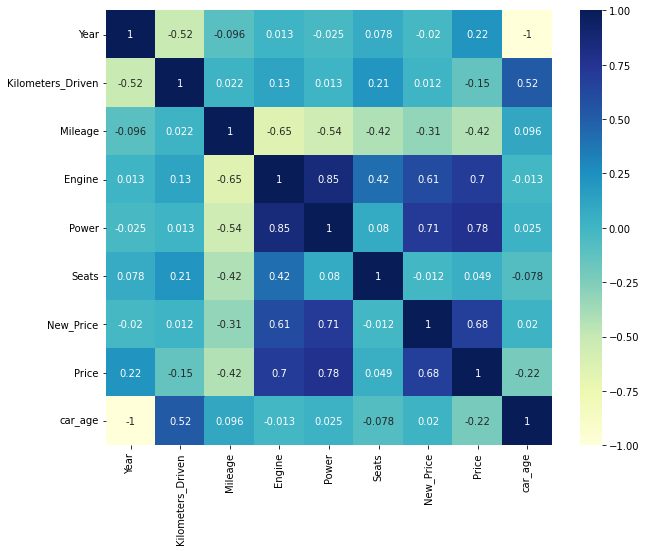

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_newprice.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

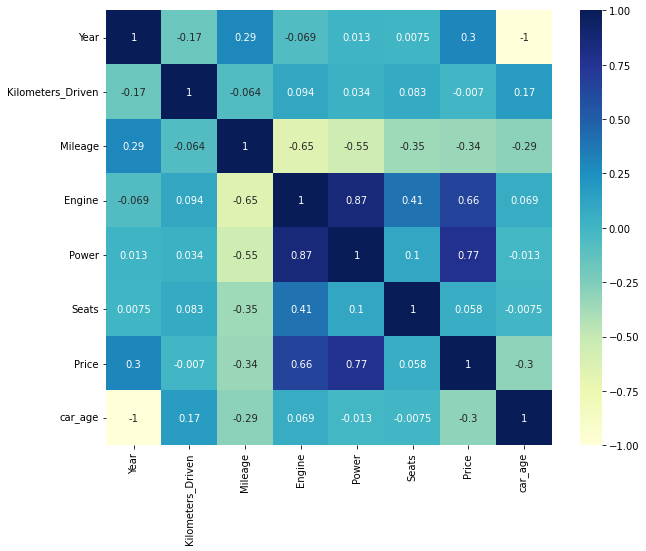

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_nonewprice.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

Km rodado depende cerca de 52% do Year.

Mileage depende 65% Engine, 55 da Power, 35% do Seats e 24 % do car_age

O Price depende 77 % do Power, 66 % da Engine e 30% do Year

Price Vs Engine Vs Transmission

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


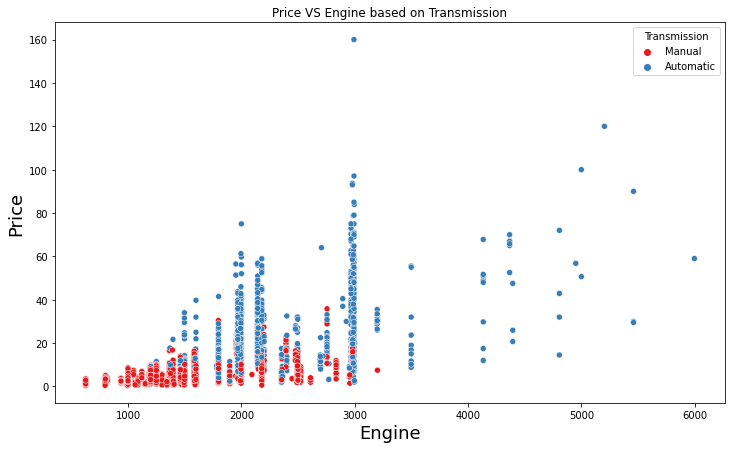

In [107]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size':18,
        }

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(data=df_nonewprice, 
                x="Engine", 
                y="Price", 
                hue="Transmission",
                palette="Set1")

plt.xlabel('Engine', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

O preço dos carros manuais não passam de 20 Lakh e o Engine não passam dos 3000 CC


Price Vs Power vs Transmission

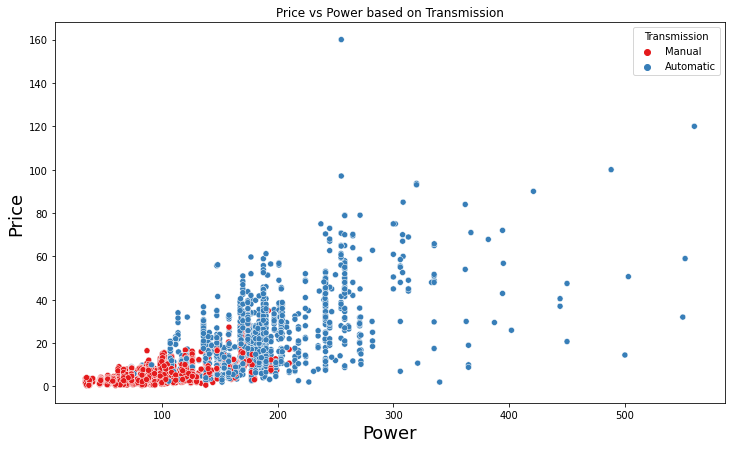

In [108]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price vs Power based on Transmission")
sns.scatterplot(data=df_nonewprice, 
                y ="Price", 
                x ="Power", 
                hue="Transmission",
                palette="Set1")
plt.xlabel('Power', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

Em relação a Power, os carros manuais não ultrapasam os 200 e os preços não passam de 20 Lakh

Price Vs Mileage Vs Transmission

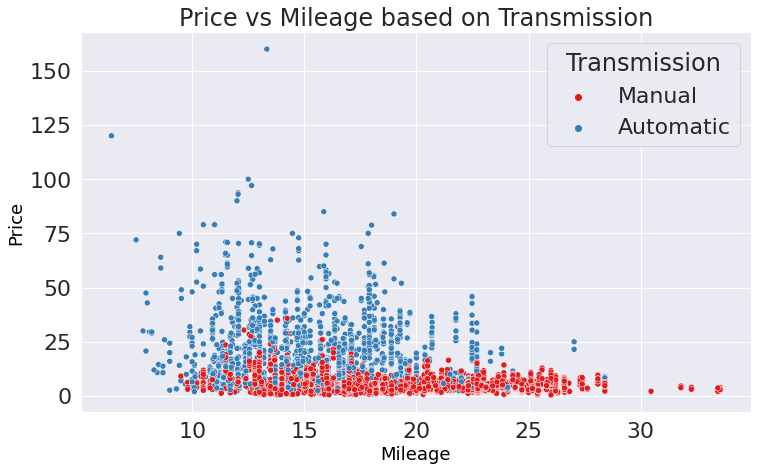

In [ ]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price vs Mileage based on Transmission")
sns.scatterplot(data=df_nonewprice, 
                y ="Price", 
                x ="Mileage", 
                hue="Transmission",
                palette="Set1")

plt.xlabel('Mileage', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

Quanto a quilometragem, os carros manuais estão bem distribuidos, mas o preço, novamente, não ultrapassa os 25 Lakh

Price Vs Mileage vs Fuel_type

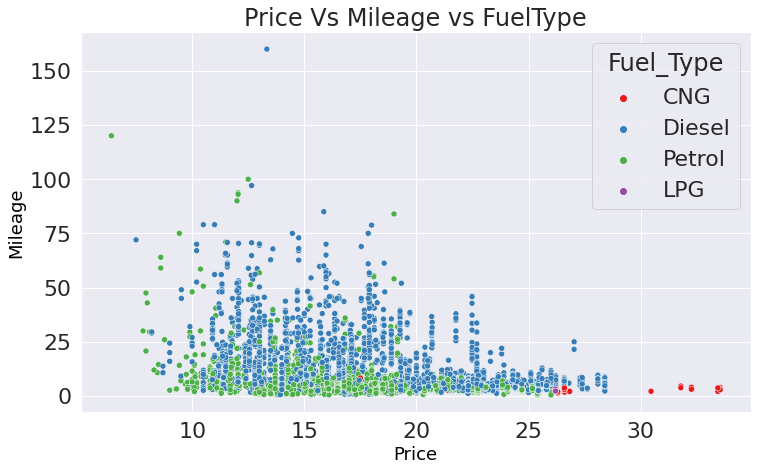

In [ ]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price Vs Mileage vs FuelType")
sns.scatterplot(data=df_nonewprice, 
                y ="Price", 
                x ="Mileage", 
                hue="Fuel_Type",
                palette="Set1")

plt.xlabel('Price', fontdict = font)
plt.ylabel('Mileage', fontdict = font)
plt.show()

Quanto ao tipo de combustivel, os carros mais caro são movido a CNG. 

Price Vs Year Vs Transmission

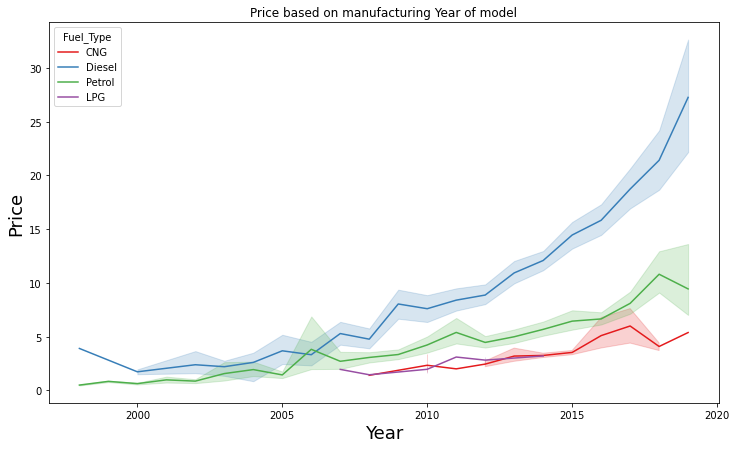

In [109]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18
        }

plt.title("Price based on manufacturing Year of model")

sns.lineplot(data=df_nonewprice, 
                y ="Price", 
                x ="Year", 
                hue="Fuel_Type",
                palette="Set1")

plt.xlabel('Year', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

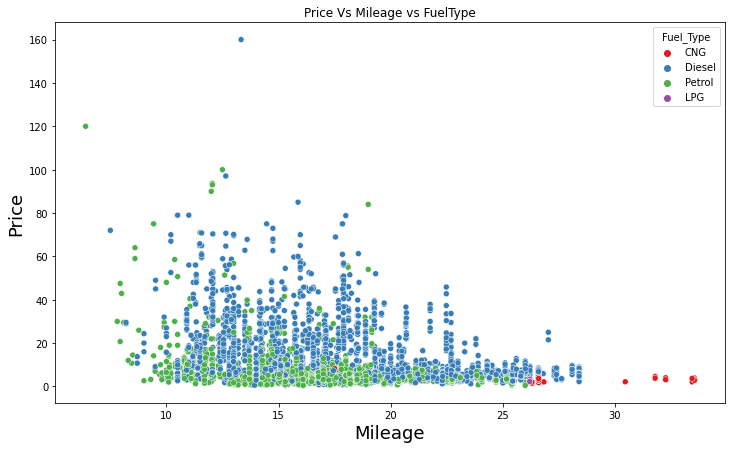

In [110]:
plt.figure(figsize=(12,7))


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price Vs Mileage vs FuelType")
sns.scatterplot(data=df_nonewprice, 
                y ="Price", 
                x ="Mileage", 
                hue="Fuel_Type",
                palette="Set1")

plt.xlabel('Mileage', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


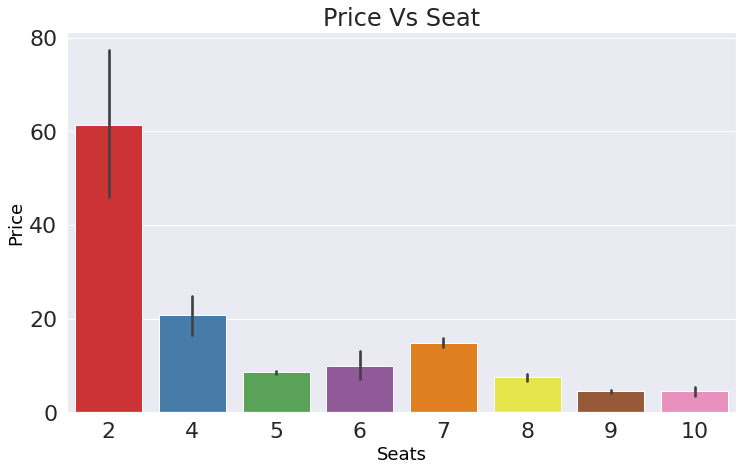

In [111]:
plt.figure(figsize=(12,7))
sns.set(font_scale = 2)


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price Vs Seat")
sns.barplot(data=df_nonewprice, 
                y ="Price", 
                x ="Seats", 
                palette="Set1")

plt.xlabel('Seats', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.show()

O preço dos carros de 2 lugares são maiores. cerca de 60 Lakh

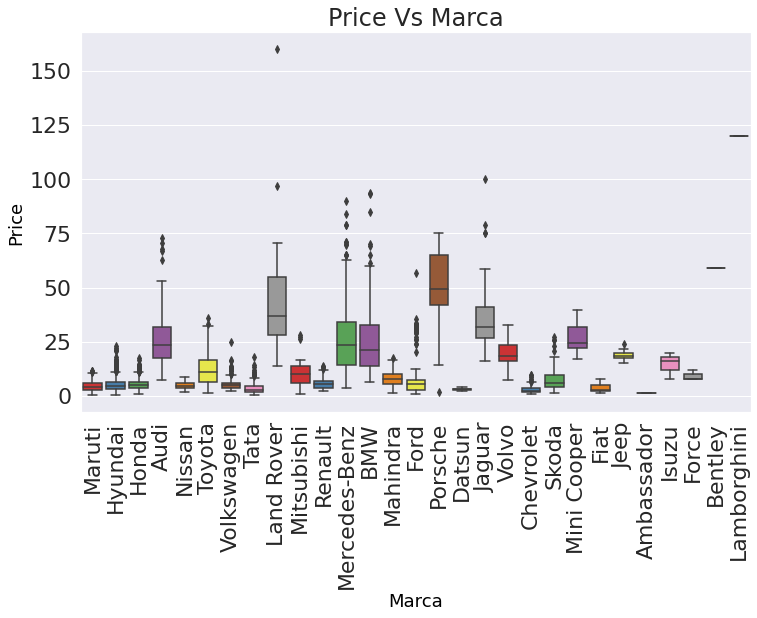

In [114]:
plt.figure(figsize=(12,7))
sns.set(font_scale = 2)


font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.title("Price Vs Marca")
sns.boxplot(data=df_nonewprice, 
                y ="Price", 
                x ="Brand", 
                palette="Set1")

plt.xlabel('Marca', fontdict = font)
plt.ylabel('Price', fontdict = font)
plt.xticks(rotation = 90)
plt.show()

A marca com os preços mais elevados são da Land Rover, Mercedes, BMW e Jaguar.

## Machine Learning

### Dados nonewPrice

In [127]:
#Fazendo uma copia do conjunto nonewprice
df2 = df_nonewprice.copy()

In [128]:
#Pensando já na criação dos modelos de predição, devemos selecionar as colunas "Object" onde vamos transformas em numérico
col_obj = []
for i in df_nonewprice.columns:
  if df_nonewprice[i].dtype == "O":
    col_obj.append(i)

In [129]:
#features do tipo object
col_obj

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Brand',
 'Model']

Selecionando algumas das colunas object para transformar em numérica que iremos utilizar em nosso df

In [130]:
cols = ['Fuel_Type', 'Transmission', "Owner_Type"]

In [131]:
#Transformando em colunas numéricas 
le = preprocessing.LabelEncoder()

for i in cols:
  df2[i] = le.fit_transform(df2[i])

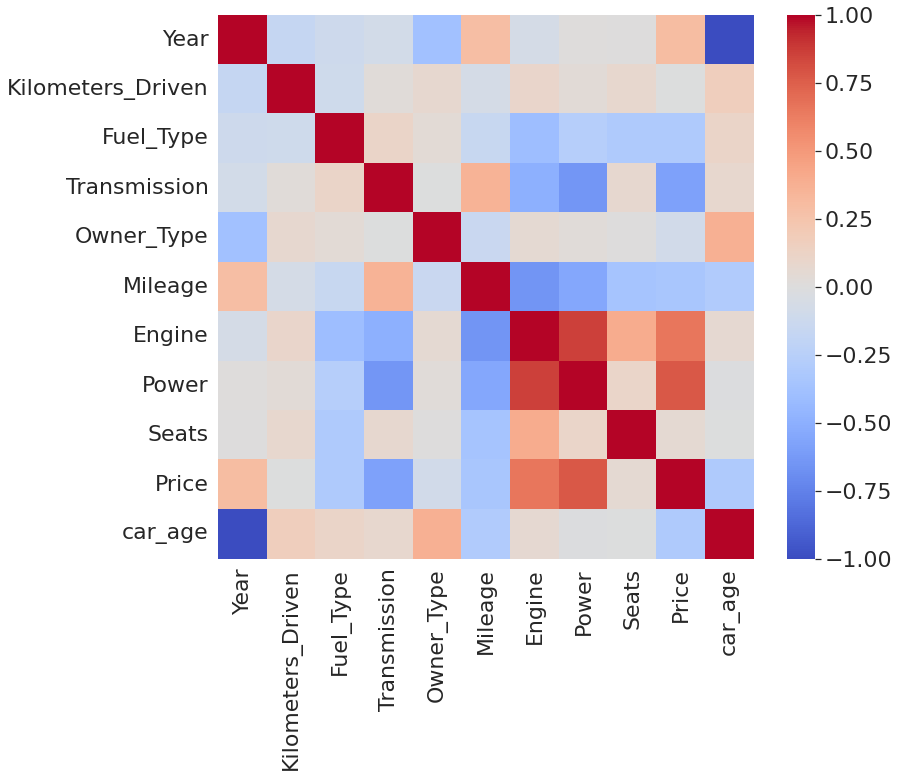

In [132]:
#Criando um mapa de calor com a correlção entre as variaveis
fig, ax = plt.subplots(figsize=(12,10))
corr = df2.corr()
sns.heatmap(corr, cmap="coolwarm")

In [133]:
#Identificando quais são as colunas que contribuem mais para o preço de venda
corr.iloc[0].sort_values(ascending = False)

Year                 1.000000
Price                0.297621
Mileage              0.294647
Power                0.012603
Seats                0.007486
Engine              -0.069411
Transmission        -0.084300
Fuel_Type           -0.111351
Kilometers_Driven   -0.168937
Owner_Type          -0.377497
car_age             -1.000000
Name: Year, dtype: float64

In [134]:
#Excluindo as colunas object
df2.drop(['Name','Model','Year','Location','Brand'],
         axis=1,inplace=True)

In [135]:
#Nosso df pronto pra aplicar os modelos 
df2.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age
0,72000,0,1,0,26.60,998.0,58.16,5,1.75,12
1,41000,1,1,0,19.67,1582.0,126.20,5,12.50,7
2,46000,3,1,0,18.20,1199.0,88.70,5,4.50,11
3,87000,1,1,0,20.77,1248.0,88.76,7,6.00,10
4,40670,1,0,2,15.20,1968.0,140.80,5,17.74,9


In [136]:
#Lembrando que em y temos a coluna que queremos prever
y = df2["Price"]
X = df2.drop(columns = ["Price"])

In [137]:
#Criano as dados de treino e teste, o teste será 20 %.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
#Os modelos de regressão que utilizaremos aqui em nosso conjunto de dados. 
models = {"KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor()}

In [139]:
#Criando uma função para criar cada modelo, fazer o fit e o score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(123)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [140]:
#Passando o parametros para a nossa função
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train= y_train, 
                             y_test= y_test)

[16:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
#Verificando o score de cada modelo
model_scores

{'DecisionTree': 0.8070477795594847,
 'KNN': 0.6156517376723061,
 'LinearRegression': 0.7220236529789501,
 'RandomForest': 0.9068352548033596,
 'XGBoost': 0.9087201811370751}

In [142]:
#Criando um dataframe com os retornos de cada modelo
com_model = pd.DataFrame(list(model_scores.items()),
                         columns = ["Model", "Accuracy"])

com_model

,Model,Accuracy
0,KNN,0.615652
1,RandomForest,0.906835
2,DecisionTree,0.807048
3,LinearRegression,0.722024
4,XGBoost,0.908720


In [143]:
fig = px.bar(com_model, 
             x = "Model", 
             y = "Accuracy",
             title = "Accuracy of each model")
fig.show()

### Dados newprice

In [144]:
df_newprice.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,8.61,4.50,Honda,JazzV,11
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,21.00,17.50,Toyota,InnovaCrysta,6
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5,10.65,9.95,Maruti,CiazZeta,4
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7,32.01,15.00,Mitsubishi,PajeroSport,8
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5,47.87,18.55,BMW,3Series,8


In [145]:
df3 = df_newprice.copy()

In [146]:
cols = ['Fuel_Type', 'Transmission', "Owner_Type"]

In [147]:
le = preprocessing.LabelEncoder()

for i in cols:
  df3[i] = le.fit_transform(df3[i])

In [149]:
df3.drop(['Name','Model','Year','Location','Brand'],
         axis=1,inplace=True)

In [150]:
#Lembrando que em y temos a coluna que queremos prever
y = df3["Price"]
X = df3.drop(columns = ["Price"])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
models = {"KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor()}

In [154]:
#Criando uma função para criar cada modelo, fazer o fit e o score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(123)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [155]:
#Passando o parametros para a nossa função
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train= y_train, 
                             y_test= y_test)

[16:59:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [156]:
#Verificando o score de cada modelo
model_scores

{'DecisionTree': 0.4368350571306189,
 'KNN': 0.4427803001086845,
 'LinearRegression': 0.7015464225668355,
 'RandomForest': 0.6970026168471211,
 'XGBoost': 0.6152045718980794}

Score bem baixo.
Isso deve ao fato de termos poucos dados pra treinar o nosso modelo

### Escolhendo o modelo XGBoost

In [157]:
#Lembrando que em y temos a coluna que queremos prever
y = df2["Price"]
X = df2.drop(columns = ["Price"])

In [158]:
X.shape

(5844, 9)

In [159]:
y.shape

(5844,)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
#Criando o modelo XGBoost regressor 
xg_reg = xgb.XGBRegressor()

In [162]:
#Fazendo o fit
xg_reg.fit(X_train, y_train)

[17:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [163]:
preds = xg_reg.predict(X_test)

In [165]:
#Obtemos o score que ja conhecemos
xg_reg.score(X_test, y_test)

0.9087201811370751

In [166]:
#O nosso root mean Squared Error
rmse = mean_squared_error(y_test,
                          preds, 
                          squared = False)

# Root Mean Squared Error RMSE
print("RMSE: %.3f" % (rmse))

RMSE: 3.276


In [167]:
#Os parametro por default
xg_reg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Melhorando o nosso modelo XGBOOST

In [170]:
#testando alguns a combinação de alguns parametros
xgb_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                  'n_estimators': [50, 100, 200],
                  'subsample': [0.3, 0.5, 0.9, 1],
                  "max_depth": [3, 4, 5, 8]}

In [171]:
grid_mse = GridSearchCV(estimator=xg_reg,
                        param_grid=xgb_param_grid,
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1)

In [172]:
grid_mse.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:43] WARNING: /workspace/src/objective/reg

GridSearchCV(cv=4, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.9],
                         'max_depth': [3, 4, 5, 8],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.3, 0.5, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [175]:
#Mostrando os melhores parametros com as combinações mostrada acima.
print("Best parameters found: ", grid_mse.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}


In [174]:
#Ajustando os parametros que otmizam nosso modelo
xg_reg_tunni = xgb.XGBRegressor(learning_rate = 0.1,
                                max_depth = 5,
                                n_estimators = 200,
                                subsample=0.9)

In [183]:
#Obtemos então um score ainda melhor, cerca de 91,4%
xg_reg_tunni.fit(X_train, y_train)
preds_tunni = xg_reg_tunni.predict(X_test)
xg_reg_tunni.score(X_test, y_test)

[17:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9138900741376466

In [ ]:
#Nosso erro médio quadrado é de 3.182
rmse_tunni = mean_squared_error(y_test,
                          preds_tunni, 
                          squared = False)

# Root Mean Squared Error RMSE_tunning
print("RMSE: %.3f" % (rmse_tunni))

RMSE: 3.182


In [177]:
mse = make_scorer(mean_absolute_error)

In [179]:
#Validação cruzada
cv_results = cross_val_score(xg_reg_tunni, 
                             X_train, 
                             y_train, 
                             cv=3,
                             scoring = mse)

[17:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [180]:
#Validação cruzada
print(cv_results)

[1.77700929 1.60867806 1.64190623]


In [181]:
print('The mean:  %.3f'% cv_results.mean())
print('The std:  %.3f'%cv_results.std())

The mean:  1.676
The std:  0.073


In [184]:
#Valores previstos e valores reais
fig = go.Scatter(x = preds_tunni, 
                 y =  y_test,
                 mode = "markers",
                 marker = {"color":"red",
                              "line": {'width': 1,
                                      'color': '#c0392b'}},
                 opacity=.8)
                 

layout = go.Layout(title= "Predicted value/actual value",
                   yaxis = {"title": "Real value"},
                   xaxis = {"title":"Predicted value"})

data = [fig]

figura = go.Figure(data = data, layout = layout)

py.iplot(figura)

In [185]:
#Feature mais importantes
for i, item in enumerate(xg_reg_tunni.feature_importances_):
  print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

Kilometers_Driven: 0.04
Fuel_Type: 0.05
Transmission: 0.09
Owner_Type: 0.01
Mileage: 0.03
Engine: 0.06
Power: 0.51
Seats: 0.04
car_age: 0.18


In [187]:
#Criando dataframe com as features e a porcentagem da sua contribuição para o preço do imóvel
feature = []
values = []
for i, item in enumerate(xg_reg_tunni.feature_importances_):
  feature.append(X_train.columns[i])
  values.append(item*100)


var_import = pd.DataFrame(zip(feature, values), 
                          columns = ["Feature", "Values (%)"])

In [188]:
#Features mais importante e as porcentagem na contribuiçao para o valor do preço
var_import = var_import.sort_values("Values (%)", 
                       ascending = False)
var_import.set_index("Feature", inplace = True)
var_import

,Values (%)
Feature,
Power,51.344007
car_age,18.359418
Transmission,9.051594
Engine,5.715676
Fuel_Type,4.723398
Seats,4.136629
Kilometers_Driven,3.651530
Mileage,2.502532
Owner_Type,0.515210


In [189]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x = var_import.index, 
                y =  var_import["Values (%)"],
                marker = {"color":"blue"})


layout = go.Layout(title= "Rank of features affect on car price",
                   yaxis = {"title": "(%)"},
                   xaxis = {"title":"Features"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Verificando o nosso modelo (Overfitting ou Underfitting)

In [190]:
xg_reg_tunni.fit(X_train, y_train)

[17:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=200, subsample=0.9)

In [191]:
preds_tunni = xg_reg_tunni.predict(X_test)

In [192]:
xg_reg_tunni.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.9,
 'verbosity': 1}

Validação do modelo - Vamos usar dados que não foram vistos ainda para validar o modelo

Vamos pegar o conjunto de dados que separamos que tinha o preço dos carros novos.

In [193]:
#Excluindo a coluna New_Price -VALIDAçÂO
df3.drop(columns = ["New_Price"], inplace = True)

In [195]:
df3.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age
2,46000,2,1,0,18.20,1199.0,88.70,5,4.50,11
7,36000,1,0,0,11.36,2755.0,171.50,8,17.50,6
10,25692,2,1,0,21.56,1462.0,103.25,5,9.95,4
15,110000,1,1,0,13.50,2477.0,175.56,7,15.00,8
20,32982,1,0,0,22.69,1995.0,190.00,5,18.55,8


In [196]:
#Lembrando que em y temos a coluna que queremos prever
y_val = df3["Price"]
X_val = df3.drop(columns = ["Price"])

In [197]:
#Score de aproximadamente 97%
preds_val = xg_reg_tunni.predict(X_val)
xg_reg_tunni.score(X_val, y_val)

0.9699450411581122

In [198]:
#O root mean square error na validação do modelo é ainda menor
rmse_val = np.sqrt(mean_squared_error(y_val, preds_val))
print("RMSE: %.3f" % (rmse_val))

RMSE: 2.565


In [200]:
#Usamos os dados newprice, nao "visto" pelo nosso modelo para validação, verificar a performance. 
fig = go.Scatter(x = preds_val, 
                 y =  y_val,
                 mode = "markers",
                 marker = {"color":"green",
                              "line": {'width': 1,
                                      'color': '#c0392b'}},
                 opacity=.8)
                 

layout = go.Layout(title= "Validation - Predicted value/actual value",
                   yaxis = {"title": "Real value"},
                   xaxis = {"title":"Predicted value"})

data = [fig]

figura = go.Figure(data = data, layout = layout)

py.iplot(figura)

In [201]:
validation = pd.DataFrame(zip(y_val, preds_val, preds_val - y_val), 
                    columns = ["Price_real", "Price_predict", "Diference"])

In [202]:
validation.head()

,Price_real,Price_predict,Diference
0,4.50,3.102693,-1.397307
1,17.50,17.622976,0.122976
2,9.95,8.898749,-1.051251
3,15.00,14.418668,-0.581332
4,18.55,20.880751,2.330751


Valores em Lakh

Temos nesse df o valor real, o valor predito e a diferença entre o valor real e o valor predito.

Obtemos um modelo com um score de 91,4 % e um RMSE de 3.1 Lakh